# Monte Carlo Integration

**Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

Let’s start with a simple integration problem in 1D,

$$\int_1^5 x^2 dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

**integrate(x\*\*2)**

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/intX2Wolfram.png" />

**integrate_{1}^{5}(x\*\*2)dx**


<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/intX2DefWolfram.png" />



**(My example) Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

Let’s start with a simple integration problem in 1D,

$$\int_0^4 2*x^3 dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

**integrate(2 * x\*\*3)**

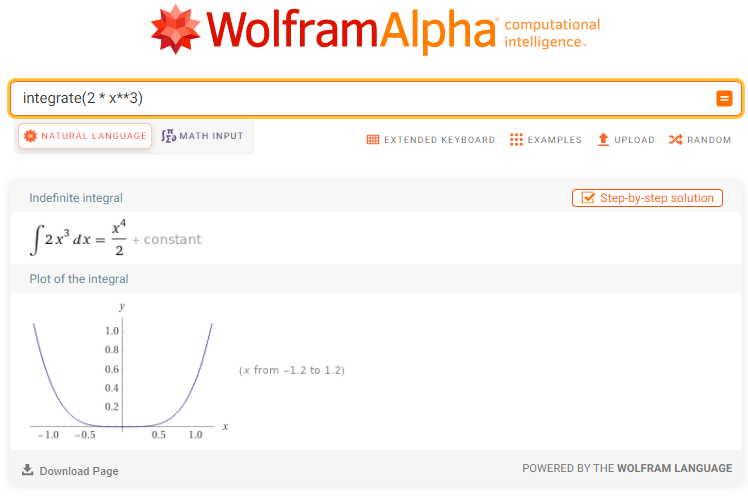

[link text](https:// [link text](https://))**integrate_{0}^{4}(2 * x\*\*3)**

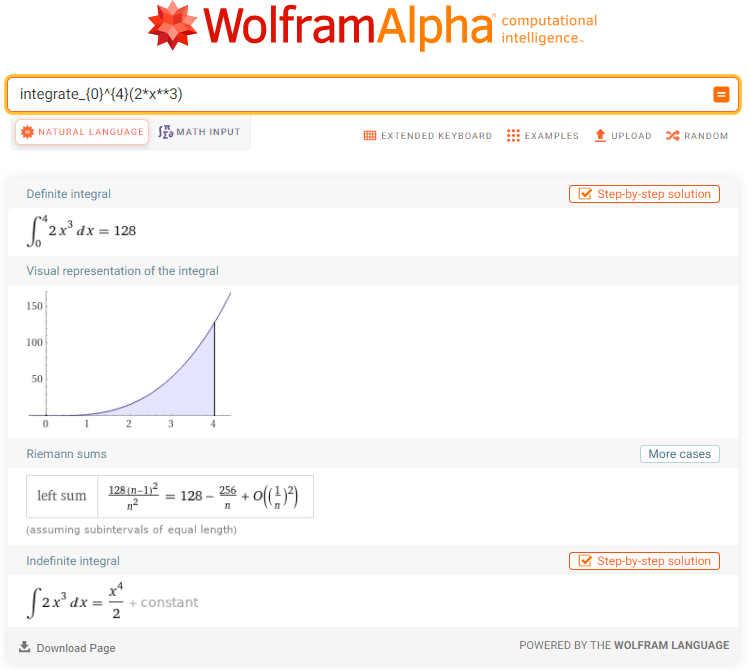

## Sympy symbolic integration
* integrate https://docs.sympy.org/latest/modules/integrals/integrals.html 
* Symbol https://docs.sympy.org/latest/modules/core.html#symbol
* cos https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* sin https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* pi https://docs.sympy.org/latest/modules/core.html#pi 
* Rational https://docs.sympy.org/latest/modules/core.html#rational 
* evaluate https://docs.sympy.org/latest/modules/evalf.html
* basic operations https://docs.sympy.org/latest/tutorial/basic_operations.html

In [1]:
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(x**2)
print(i)
result["analytical"] = float(i.subs(x, 5) - i.subs(x, 1))
print("Analytical result: {}".format(result["analytical"]))

x**3/3
Analytical result: 41.333333333333336


In [2]:
# my example
import sympy
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(2*(x**3))
print(i)
result["analytical"] = float(i.subs(x, 4) - i.subs(x, 0))
print("Analytical result: {}".format(result["analytical"]))

x**4/2
Analytical result: 128.0



We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$  \int_I f(x) dx = \mathbb{E}_I(f(x)) \times volume(I)$$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.


<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/X2MonteCarloXrandom.png" />

Generate  $r_1,r_2,\cdots, r_N$ random uniform random points in $[1,5]$ and evaluate the fucntion $f(x)=x^2$ in ecah random point $f_i = r_i^2$, calculate the  experimental average of the value fo the fucnction
$$
\overline{f} = \frac{1}{N} \sum_{i=1}^{N} f_i = 31/3 = 10.333\cdots
$$  
The estimation of $\mathbb{E}_I(f(x))$ is $\overline{f} =10.333\cdots$ and $volume(I)=(5-1)$ therefore the estimation integral is 

$$
\int_1^5 x^2 dx \approx volume(I) \times \overline{f} = (5-1) \times 10.33333\cdots = 41.333\cdots
$$ 

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/X2MonteCarloXrandom1.png" />


In [3]:
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("expected value =",accum/float(N))
print("Standard Monte Carlo result: {}".format(result["MC"]))

expected value = 10.336585778682942
Standard Monte Carlo result: 41.346343114731766



We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$  \int_I f(x) dx = \mathbb{E}_I(f(x)) \times volume(I)$$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.


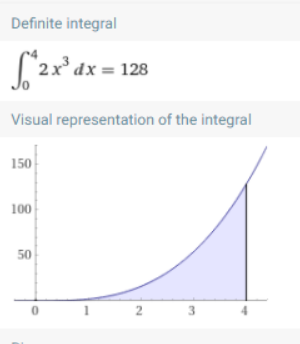

Generate  $r_1,r_2,\cdots, r_N$ random uniform random points in $[1,5]$ and evaluate the fucntion $f(x)=x^2$ in ecah random point $f_i = r_i^2$, calculate the  experimental average of the value fo the fucnction
$$
\overline{f} = \frac{1}{N} \sum_{i=1}^{N} f_i = 31.965\cdots
$$  
The estimation of $\mathbb{E}_I(f(x))$ is $\overline{f} =31.965\cdots$ and $volume(I)=(4-0)$ therefore the estimation integral is 

$$
\int_1^5 x^2 dx \approx volume(I) \times \overline{f} = (4-0) \times 31.965\cdots = 127.863\cdots
$$ 

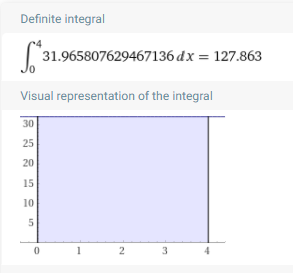


In [4]:
# my example
import numpy
N = 1_000_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(0, 4)
    accum += 2*(x**3)
volume = 4 - 0
result["MC"] = volume * accum / float(N)
print("expected value =",accum/float(N))
print("Standard Monte Carlo result: {}".format(result["MC"]))

expected value = 32.02048396519445
Standard Monte Carlo result: 128.0819358607778


**integrate_{1}^{5}(x\*\*2 * sin(x)\*\*3)dx**

> Indented block



<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/SymPyLab/sympylabwolfram8.jpg" />

In [5]:
import sympy
x = sympy.Symbol("x")
i = sympy.integrate(x**2 * sympy.sin(x)**3)
print(i)
print(float(i.subs(x, 5) - i.subs(x, 1)))

-x**2*sin(x)**2*cos(x) - 2*x**2*cos(x)**3/3 + 14*x*sin(x)**3/9 + 4*x*sin(x)*cos(x)**2/3 + 14*sin(x)**2*cos(x)/9 + 40*cos(x)**3/27
-15.42978215330555


In [6]:
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(1, 5)
    accum += x**2 * numpy.sin(x)**3
volume = 5 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: -15.384867594288862


**(my example) integrate_{0}^{4}(2 * x\*\*3 * cos(x)\*\*3)dx**

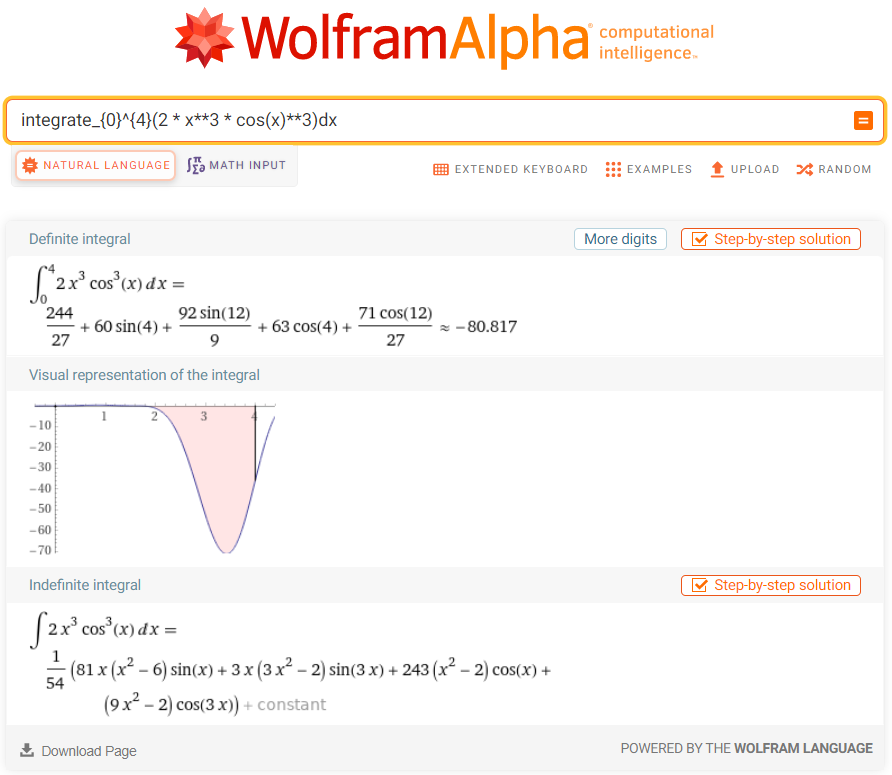

In [7]:
# my example
import sympy
x = sympy.Symbol("x")
i = sympy.integrate(2 * (x**3) * (sympy.cos(x)**3))
print(i)
print(float(i.subs(x, 4) - i.subs(x, 0)))

4*x**3*sin(x)**3/3 + 2*x**3*sin(x)*cos(x)**2 + 4*x**2*sin(x)**2*cos(x) + 14*x**2*cos(x)**3/3 - 80*x*sin(x)**3/9 - 28*x*sin(x)*cos(x)**2/3 - 80*sin(x)**2*cos(x)/9 - 244*cos(x)**3/27
-80.81660502910965


In [8]:
# my example
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(0, 4)
    accum += 2 * (x**3) * (numpy.cos(x)**3)
volume = 4 - 0
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: -81.11601165676785


# Monte Carlo Area Approximation



![MontecarloAreas.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/MontecarloAreas.png)

## Polar Curves - Brilliant

* https://brilliant.org/wiki/polar-curves/

![PolarCurvesBrilliant.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/PolarCurvesBrilliant.png)

### Area inside of polar curve - UT Calculus

* https://web.ma.utexas.edu/users/m408s/m408d/CurrentWeb/LM10-4-2.php

![IntPolarCurvesUTCalculus.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/IntPolarCurvesUTCalculus.png)


# Plotting and Calculating the Area with Wolfram Alpha 

## polar r=1−cosθsin3θ, θ in[0,2pi]

![PolarCurvesWolfram.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/PolarCurvesWolfram.png)

## 1/2 int_0^{2pi} (1-cosθsin3θ)^2 dθ 

![IntPolarCurvesWolfram.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/IntPolarCurvesWolfram.png)

##  area under 1/2 (1-cos t sin 3t)^ 2 for 0<t<2pi

![AreaUnderWolfram.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/AreaUnderWolfram.png)



## 1/2 integral(1 - cos(θ) sin(3 θ))^2 dθ 


(5 θ)/8 + 1/16 sin(2 θ) - 1/64 sin(4 θ) - 1/48 sin(6 θ) - 1/128 sin(8 θ) + (cos^2(θ))/2 + 1/8 cos(4 θ) + constant

Replacing in (2π) = 2*pi 
(10 pi)/8 + 1/16 sin(4 pi) - 1/64 sin(8 pi) - 1/48 sin(1 2pi) - 1/128 sin(16 pi) + (cos^2(2 pi))/2 + 1/8 cos(6 pi)  = (5 π)/4  

Replacing in 0 
1/16 sin(0) - 1/64 sin(0) - 1/48 sin(0) - 1/128 sin(0) + (cos^2(0))/2 + 1/8 cos(0) = 5/8

Difference
(5 π)/4 = 3.92699

![AreaUnderWolfram1.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/AreaUnderWolfram1.png)




# (my example) Plotting and Calculating the Area with Wolfram Alpha 

## polar r=1−cosθsin7θ, θ in[0,2pi]

![PolarCurvesWolfram.png](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab6/images/polarGraph.png?raw=true)

## 1/2 int_0^{2pi} (1−cosθsin7θ)^2 dθ 

![IntPolarCurvesWolfram.png](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab6/images/firstIntegral.png?raw=true)

##  area under 1/2 (1-cos t sin 7t)^ 2 for 0<t<2pi

![AreaUnderWolfram.png](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab6/images/arearUnder.png?raw=true)



## 1/2 integral(1 - cos(θ) sin(7 θ))^2 dθ 


1/2 * ( (5 θ)/4 + 1/8 sin(2 θ) - 1/96 sin(12 θ) - 1/56 sin(14 θ) - 1/128 sin(16 θ) + 1/6 cos(6 θ) + 1/8 cos(8 θ) ) + constant

Replacing in (2π) = 2*pi 
1/2 * ( (10 pi)/4 + 1/8 sin(4 pi) - 1/96 sin(24 pi) - 1/56 sin(28 pi) - 1/128 sin(32 pi) + 1/6 cos(12 pi) + 1/8 cos(16 pi) ) = 7/48 + 5*pi/4

Replacing in 0 
1/2 * ( (0)/4 + 1/8 sin(0) - 1/96 sin(0) - 1/56 sin(0) - 1/128 sin(0) + 1/6 cos/(0) + 1/8 cos(0) ) = 7/48

Difference
(5 π)/4 = 3.92699

![AreaUnderWolfram1.png](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab6/images/indefiniteIntegral.png?raw=true)

![result1.png](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab6/images/result1.png?raw=true)

![result2.png](https://github.com/AndresRPerez12/MetNumUN2021II/blob/main/Lab6/images/result2.png?raw=true)




**Now the area inside the polar curve** $r= 1- \cos(\theta) \sin(3\theta)$

In [9]:
from sympy import integrate, Symbol, cos, sin, pi,  Rational

theta = Symbol('theta')
integrate((1- cos(theta)* sin(3*theta))**2)

theta*sin(theta)**2*sin(3*theta)**2/4 + theta*sin(theta)**2*cos(3*theta)**2/4 + theta*sin(3*theta)**2*cos(theta)**2/4 + theta*cos(theta)**2*cos(3*theta)**2/4 + theta + sin(theta)**2*sin(3*theta)*cos(3*theta)/96 + 7*sin(theta)*sin(3*theta)**2*cos(theta)/32 + sin(theta)*sin(3*theta)/4 + 9*sin(theta)*cos(theta)*cos(3*theta)**2/32 - 17*sin(3*theta)*cos(theta)**2*cos(3*theta)/96 + 3*cos(theta)*cos(3*theta)/4

In [10]:
Rational(1,2) * integrate((1- cos(theta)* sin(3*theta))**2)

theta*sin(theta)**2*sin(3*theta)**2/8 + theta*sin(theta)**2*cos(3*theta)**2/8 + theta*sin(3*theta)**2*cos(theta)**2/8 + theta*cos(theta)**2*cos(3*theta)**2/8 + theta/2 + sin(theta)**2*sin(3*theta)*cos(3*theta)/192 + 7*sin(theta)*sin(3*theta)**2*cos(theta)/64 + sin(theta)*sin(3*theta)/8 + 9*sin(theta)*cos(theta)*cos(3*theta)**2/64 - 17*sin(3*theta)*cos(theta)**2*cos(3*theta)/192 + 3*cos(theta)*cos(3*theta)/8

In [11]:
(Rational(1,2) * integrate((1- cos(theta)* sin(3*theta))**2)).subs(theta,2*pi)-(Rational(1,2) * integrate((1- cos(theta)* sin(3*theta))**2)).subs(theta,0)

5*pi/4

**(my example) Now the area inside the polar curve** $r= 1- \cos(\theta) \sin(7\theta)$

In [12]:
# my example
from sympy import integrate, Symbol, cos, sin, pi,  Rational

theta = Symbol('theta')
integrate((1- cos(theta)* sin(7*theta))**2)

theta*sin(theta)**2*sin(7*theta)**2/4 + theta*sin(theta)**2*cos(7*theta)**2/4 + theta*sin(7*theta)**2*cos(theta)**2/4 + theta*cos(theta)**2*cos(7*theta)**2/4 + theta + sin(theta)**2*sin(7*theta)*cos(7*theta)/1344 + 47*sin(theta)*sin(7*theta)**2*cos(theta)/192 + sin(theta)*sin(7*theta)/24 + 49*sin(theta)*cos(theta)*cos(7*theta)**2/192 - 97*sin(7*theta)*cos(theta)**2*cos(7*theta)/1344 + 7*cos(theta)*cos(7*theta)/24

In [13]:
# my example
Rational(1,2) * integrate((1- cos(theta)* sin(7*theta))**2)

theta*sin(theta)**2*sin(7*theta)**2/8 + theta*sin(theta)**2*cos(7*theta)**2/8 + theta*sin(7*theta)**2*cos(theta)**2/8 + theta*cos(theta)**2*cos(7*theta)**2/8 + theta/2 + sin(theta)**2*sin(7*theta)*cos(7*theta)/2688 + 47*sin(theta)*sin(7*theta)**2*cos(theta)/384 + sin(theta)*sin(7*theta)/48 + 49*sin(theta)*cos(theta)*cos(7*theta)**2/384 - 97*sin(7*theta)*cos(theta)**2*cos(7*theta)/2688 + 7*cos(theta)*cos(7*theta)/48

In [14]:
# my example
(Rational(1,2) * integrate((1- cos(theta)* sin(7*theta))**2)).subs(theta,2*pi)-(Rational(1,2) * integrate((1- cos(theta)* sin(7*theta))**2)).subs(theta,0)

5*pi/4

# Scipy numeric integration

* intregrate.quad https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [15]:
import scipy.integrate as integrate
import math
result = integrate.quad(lambda theta: ((1/2)*(1- (math.cos(theta)* math.sin(3*theta)))**2), 0, 2*math.pi)
result

(3.9269908169872414, 1.0155038181886011e-10)

In [16]:
# my example
import scipy.integrate as integrate
import math
result = integrate.quad(lambda theta: ((1/2)*(1- (math.cos(theta)* math.sin(7*theta)))**2), 0, 2*math.pi)
result

(3.926990816987241, 9.766315750905918e-11)

# Monte Carlo area approximation



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


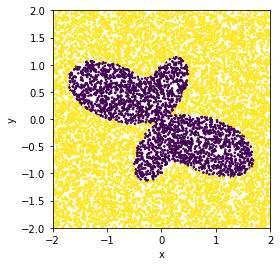

Area approx: 3.8768


In [17]:
import random 
import matplotlib.pyplot as plt
import math

n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(3*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(n))*16)

In [18]:
import random 
import matplotlib.pyplot as plt
import math

n=1000000
count = 0
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(3*theta))):
    count = count +1
print("Area approx:",(count/float(n))*16)

Area approx: 3.924032


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


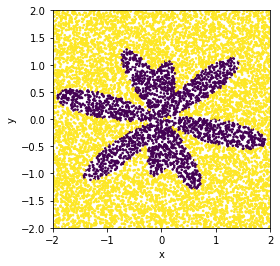

Area approx: 3.9952


In [19]:
# my example
import random 
import matplotlib.pyplot as plt
import math

n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(7*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(n))*16)

In [20]:
# my example
import random 
import matplotlib.pyplot as plt
import math

n=1000000
count = 0
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(7*theta))):
    count = count +1
print("Area approx:",(count/float(n))*16)

Area approx: 3.936016


Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipedia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [21]:
import matplotlib.pyplot as plt
import numpy 
import math

# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


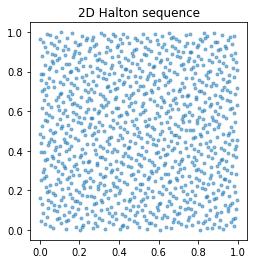

In [22]:
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


Area approx: 3.952


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


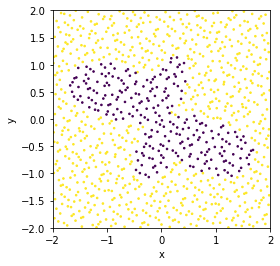

Area approx: 3.952


In [23]:
N = 1000
seq = halton(2, N)
count = 0
c=[]
xlist=[]
ylist=[]
clist=[]
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(3*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
print("Area approx:",(count/float(N))*16)
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(N))*16)


Area approx: 4.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


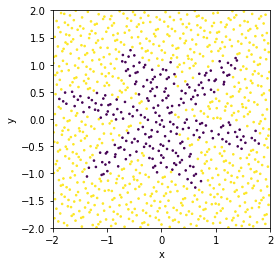

Area approx: 4.0


In [24]:
# my example
N = 1000
seq = halton(2, N)
count = 0
c=[]
xlist=[]
ylist=[]
clist=[]
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (1- math.cos(theta)* math.sin(7*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
print("Area approx:",(count/float(N))*16)
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(N))*16)


In [25]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(3*theta))):
    count = count +1
print("Area approx:",(count/float(N))*16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Area approx: 3.927168


In [26]:
# my example
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (1- math.cos(theta)* math.sin(7*theta))):
    count = count +1
print("Area approx:",(count/float(N))*16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Area approx: 3.9268


**A higher dimensional integral** [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 


Let us now analyze an integration problem in dimension 4, the Ishigami function. This is a well-known function in numerical optimization and stochastic analysis, because it is very highly non-linear.

In [27]:
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1) + 7*sympy.sin(x2)**2 + 0.1 * x3**4 * sympy.sin(x1)
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 868.175747048395


In [28]:
# my example
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.sin(x1) + 12*sympy.sin(x2)**4 + 0.5 * x3**2 * sympy.cos(x2)
res = sympy.integrate(expr,
                      (x1, 0, 2*sympy.pi),
                      (x2, 0, 2*sympy.pi),
                      (x3, 0, 2*sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 1116.2259604907936


In [29]:
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 876.7970368748179


In [30]:
# my example
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(0, 2*numpy.pi)
    xx2 = numpy.random.uniform(0, 2*numpy.pi)
    xx3 = numpy.random.uniform(0, 2*numpy.pi)
    accum += numpy.sin(xx1) + 12*numpy.sin(xx2)**4 + 0.5 * xx3**2 * numpy.cos(xx2)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 1079.9426376899921


In [31]:
import math
import numpy
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


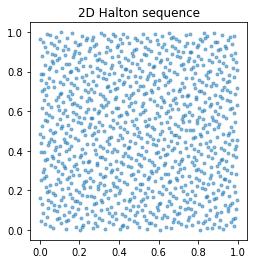

In [32]:
import matplotlib.pyplot as plt
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);

In [33]:
N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = -numpy.pi + seq[i][0] * numpy.pi * 2
    xx2 = -numpy.pi + seq[i][1] * numpy.pi * 2
    xx3 = -numpy.pi + seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1) + 7*numpy.sin(xx2)**2 + 0.1 * xx3**4 * numpy.sin(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Qausi Monte Carlo Halton Sequence result: {}".format(result["MC"]))

Qausi Monte Carlo Halton Sequence result: 868.238928030592


In [34]:
# my example
N = 10_000

seq = halton(3, N)
accum = 0
for i in range(N):
    xx1 = seq[i][0] * numpy.pi * 2
    xx2 = seq[i][1] * numpy.pi * 2
    xx3 = seq[i][2] * numpy.pi * 2
    accum += numpy.sin(xx1) + 12*numpy.sin(xx2)**4 + 0.5 * xx3**2 * numpy.cos(xx2)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 1116.3493795210811
